# ELG7186 - Winter 2022 - Assignment 1
## Due: <strong>Sunday February 6<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the MNIST dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [1]:
!pip install keras

  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)


ERROR: tensorflow 2.7.0 requires absl-py>=0.4.0, which is not installed.
ERROR: tensorflow 2.7.0 requires astunparse>=1.6.0, which is not installed.
ERROR: tensorflow 2.7.0 requires gast<0.5.0,>=0.2.1, which is not installed.
ERROR: tensorflow 2.7.0 requires grpcio<2.0,>=1.24.3, which is not installed.
ERROR: tensorflow 2.7.0 requires protobuf>=3.9.2, which is not installed.
ERROR: tensorflow 2.7.0 requires tensorflow-io-gcs-filesystem>=0.21.0, which is not installed.
ERROR: tensorflow 2.7.0 requires termcolor>=1.1.0, which is not installed.


In [2]:
!pip install tensorflow 

  Using cached protobuf-3.19.4-cp38-cp38-win_amd64.whl (895 kB)
Processing c:\users\abdallah\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached tensorflow_io_gcs_filesystem-0.23.1-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached grpcio-1.43.0-cp38-cp38-win_amd64.whl (3.4 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth-2.5.0-py2.py3-none-any.whl (157 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached cachetools-5.0.0-py3-none-any.whl (9.1 kB)
  Using cached request

In [1]:
#import libraries
from math import sqrt
from scipy.stats import mode
import keras 
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,ConfusionMatrixDisplay
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
classes in training [0 1 2 3 4 5 6 7 8 9]
classes in testing [0 1 2 3 4 5 6 7 8 9]


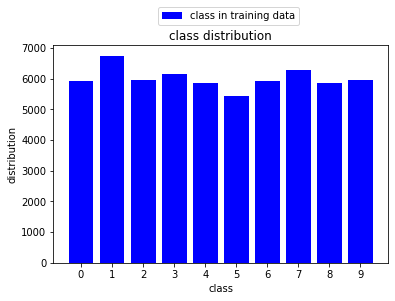

value each of classes [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


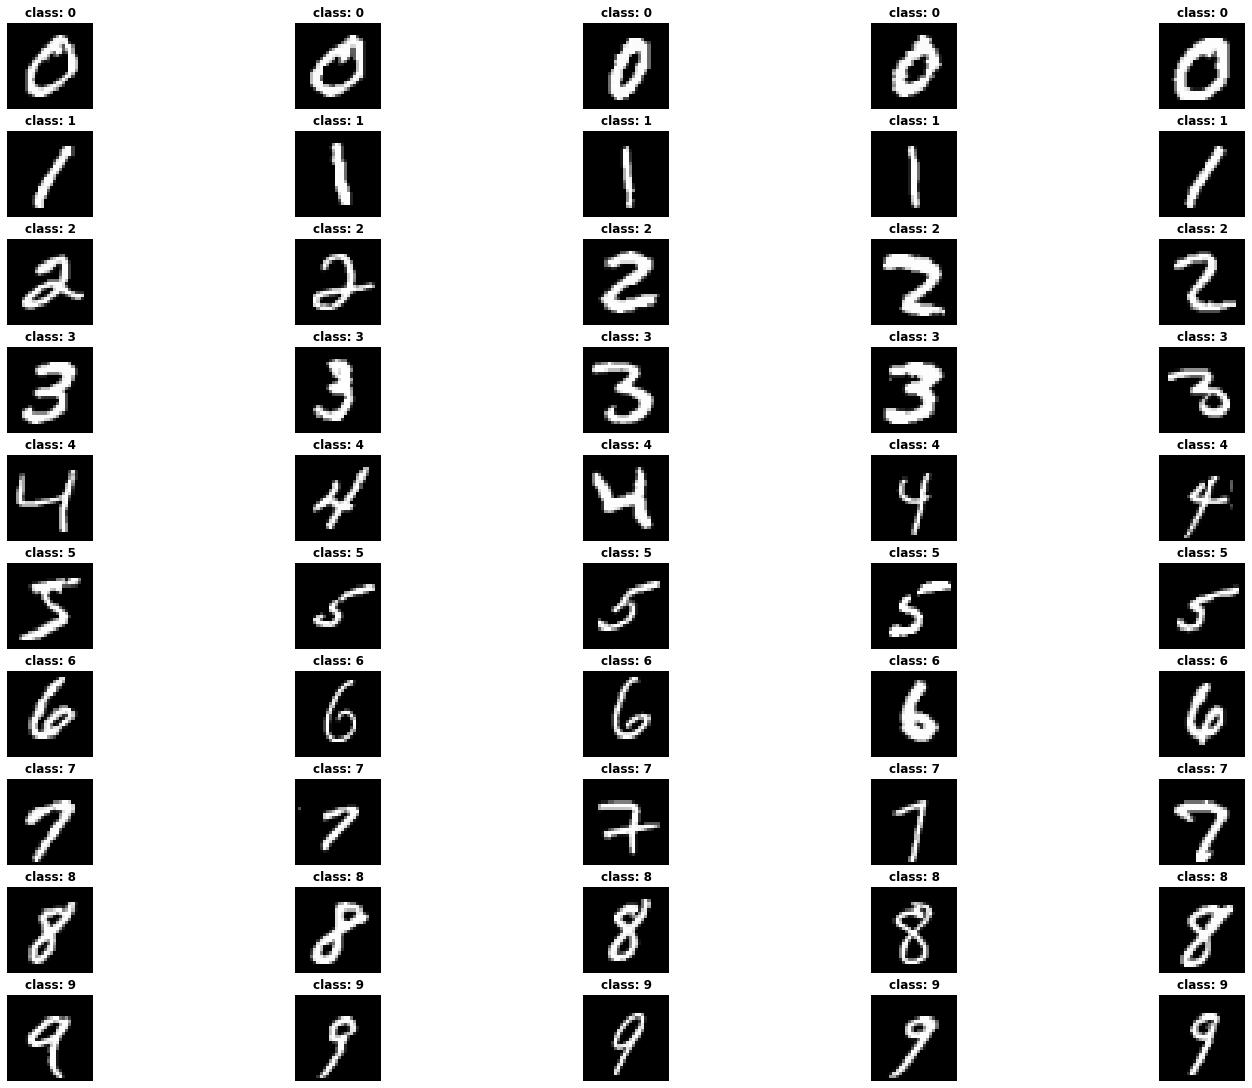

In [2]:
# Prepare your dataset here and display samples here.
#load data from keras and split data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print("classes in training",np.unique(y_train))
print("classes in testing",np.unique(y_test))
#visualize the number of class
x = np.arange(10)
plt.bar(x,np.bincount(y_train),color='b')
plt.xticks(x,range(0,10))
plt.xlabel("class")
plt.ylabel("distribution")
plt.title('class distribution')
plt.legend(["class in training data"],bbox_to_anchor =(0.75, 1.2))
plt.show()
print("value each of classes",np.bincount(y_train))
#visualize five samples
count=0
fig, axs = plt.subplots(10,5,figsize=(20,15),constrained_layout=True)
for x in np.unique(y_train):
    count=0
    for y in range(0,len(y_train)):
        if count>=5:
            break
        if x == y_train[y]:
            axs[x,count].set_axis_off()
            axs[x,count].imshow(x_train[y], cmap=plt.cm.gray,interpolation="nearest")
            axs[x,count].set_title("class: %i" % x,fontweight ="bold")
            count+=1

(10000, 28, 28)
(10000,)
classes in training [0 1 2 3 4 5 6 7 8 9]


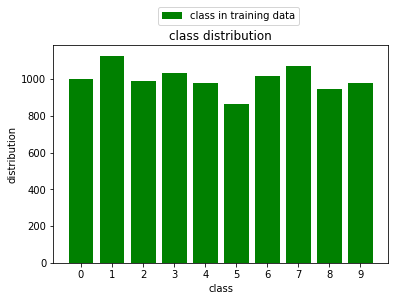

value each of classes [1001 1127  991 1032  980  863 1014 1070  944  978]


In [3]:
#reduce the number of images in train
x_train_=x_train[:10000]
print(x_train_.shape)
y_train_=y_train[:10000]
print(y_train_.shape)
print("classes in training",np.unique(y_train_))
#visualize the number of class after reduce train data
x = np.arange(10)
plt.bar(x,np.bincount(y_train_),color='g')
plt.xticks(x,range(0,10))
plt.xlabel("class")
plt.ylabel("distribution")
plt.title('class distribution')
plt.legend(["class in training data"],bbox_to_anchor =(0.75, 1.2))
plt.show()
print("value each of classes",np.bincount(y_train_))

In [4]:
#reshape data for fit from sklearn and resize the training data to reduce it
x_train__=x_train_.reshape(10000,784)
x_test__=x_test.reshape(10000,784)
train=x_train.reshape(60000,784)

In [5]:
#plt.imshow(x_train[1,:])
#print(train.shape[1])
y_train[[1,2,3]]

array([0, 4, 1], dtype=uint8)

Reference for dataset

https://keras.io/api/datasets/mnist/

## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the MNIST dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




In [8]:
class knn() :
#set number of neighbor 
  def __init__(self,K) :
    self.K = K
#calculate Manhattann distance 
  def Manhattann_dist(self,point1,point2) :
#    dist=np.sqrt(np.sum(np.square(point1-point2)))
    dist=np.sum(np.abs(point1-point2))
    return dist
#indefy the train of data and fit data before get numbers and make prediction   
  def fit_model(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
#get neighbors and predict the model
  def predict_model(self, x_test):
        label_pred=[]
        for x__test in x_test:
          dist_points=[]
          for x__train in self.x_train:
            dists =self.Manhattann_dist(x__train , x__test) 
            dist_points.append(dists)
          dist_points = np.array(dist_points)  
          dist_sorted_index = dist_points.argsort()[:self.K]
          labels_pred = self.y_train[dist_sorted_index]
          label__pred = mode(labels_pred) 
          label = label__pred.mode[0]
          label_pred.append(label)
        return label_pred

Accuracy with number of k  3: 96.33
Accuracy with number of k  5: 96.17999999999999
Accuracy with number of k  7: 96.15


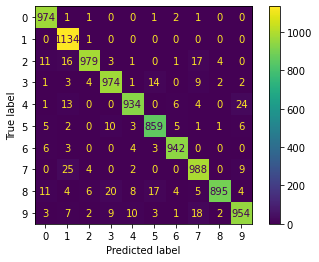

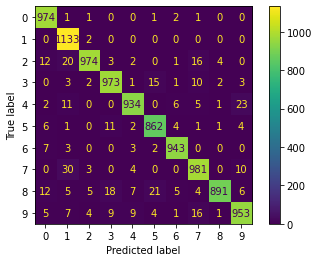

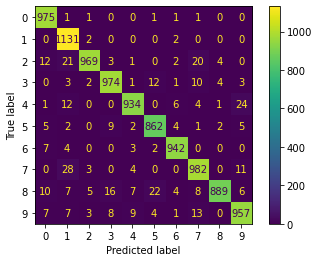

In [9]:
#Apply more value of k 3,5,7
for i in range(3,8,2):
  model=knn(i)
  model.fit_model(train/255, y_train)
  y_pred = model.predict_model(x_test__/255)
  print('Accuracy with number of k  %i:'% i, accuracy_score(y_test, y_pred)*100)
  cm_k_=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
  cm_k_.plot()

**Bouns**

In [6]:
class KNN():
#set number of neighbor 
  def __init__(self,K) :
    self.K = K
#indefy the train of data and fit data before get numbers and make prediction  
  def fit(self, x__train, y__train):
    self.x__train = x__train
    self.y__train = y__train
#calculate Manhattan distance (vectorize)   
  def Manhattann__dist(self, x, i):
    distance = np.sum(np.abs(self.x__train - x[i,:]), axis =1)
    return distance
##get neighbors and predict the model
  def prediction__model(self, x):
    label_pred=[]
    number_test = x.shape[0]
    ypred = []
    for i in range(number_test):
      distance = self.Manhattann__dist(x, i)
      min_index=distance.argsort()[:self.K]
      ypred.append(self.y__train[min_index])
      label__pred = mode(ypred[i]) 
      label = label__pred.mode[0]
      label_pred.append(label)
    return label_pred

Accuracy with number of k  3: 96.33
Accuracy with number of k  5: 96.17999999999999
Accuracy with number of k  7: 96.15


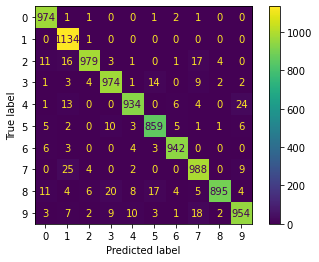

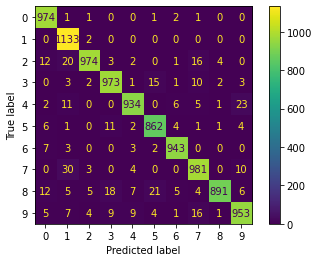

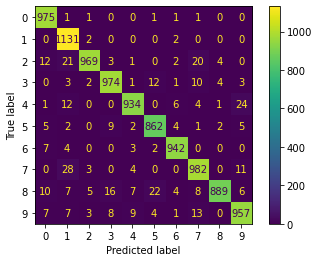

In [7]:
#Apply more value of k 3,5,7
for i in range(3,8,2):
  model_ = KNN(i)
  model_.fit(train/255, y_train)
  ypred = model_.prediction__model(x_test__/255)
  print('Accuracy with number of k  %i:'% i, accuracy_score(y_test, ypred)*100)
  cm_k=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,ypred))
  cm_k.plot()

**Reference for knn**

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch

https://aiaspirant.com/knn-from-scratch/

https://www.w3schools.com/python/python_classes.asp

https://www.geeksforgeeks.org/implementation-of-k-nearest-neighbors-from-scratch-using-python/

I applied knn without vectorize and with vectorize.knn without vectorize and with vectorize have same accuracy but knn without vectorize was taken more time than knn with vectorize so i applied knn without vectorize with k =3,5,7.the result of knn is good but not is very good compare other algorithms of machine learning because of Curse of Dimensionality and steps of knn not occur in fitting but in prediction.so dimensionality space increases it becomes exponentially more difficult to have sufficient training data to make a reasonable prediction. I obtain  the higest accuracy = 96.33 with k = 3 after scalling data but I do not scall the accuracy is very bad. 

## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the MNIST dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification. 

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the MNIST classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For MNIST you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

In [ ]:
# Write your logistic regression code here.
#functio for OvR
def binarized_labels(my_class,labels):
    labels = np.copy(labels)
    for i in range(len(labels)):
        if labels[i] == my_class:
                labels[i]=1
        else: 
            labels[i]=0
    return labels

Accuracy for LogisticRegression for class 0 : 0.9916
[[8964   56]
 [  28  952]]
Accuracy for LogisticRegression for class 1 : 0.9915
[[8833   32]
 [  53 1082]]
Accuracy for LogisticRegression for class 2 : 0.9774
[[8904   64]
 [ 162  870]]
Accuracy for LogisticRegression for class 3 : 0.9725
[[8878  112]
 [ 163  847]]
Accuracy for LogisticRegression for class 4 : 0.9793
[[8926   92]
 [ 115  867]]
Accuracy for LogisticRegression for class 5 : 0.9637
[[9010   98]
 [ 265  627]]
Accuracy for LogisticRegression for class 6 : 0.9829
[[8960   82]
 [  89  869]]
Accuracy for LogisticRegression for class 7 : 0.9838
[[8903   69]
 [  93  935]]
Accuracy for LogisticRegression for class 8 : 0.9394
[[8787  239]
 [ 367  607]]
Accuracy for LogisticRegression for class 9 : 0.9564
[[8819  172]
 [ 264  745]]
log [7 2 1 ... 4 8 6]
Accuracy for LogisticRegression_prob 90.10000000000001


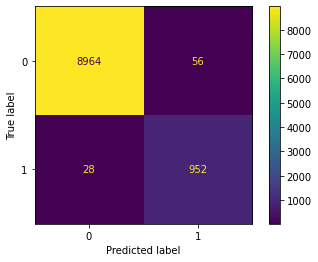

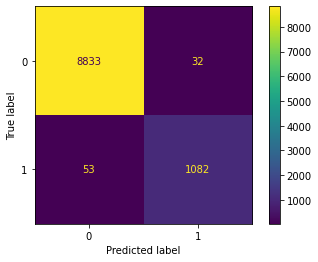

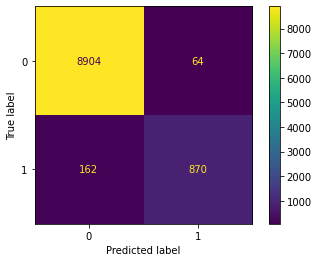

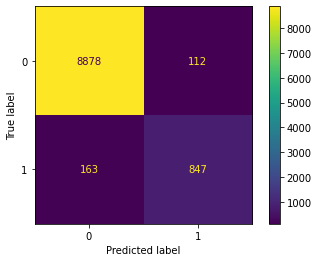

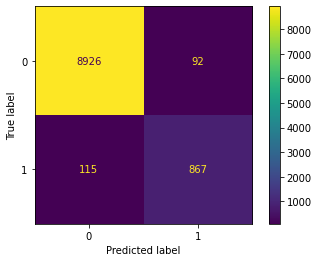

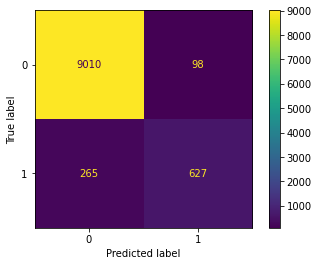

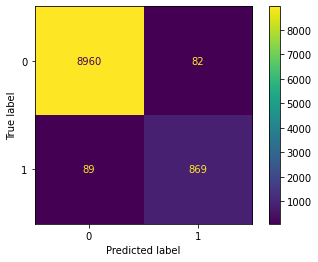

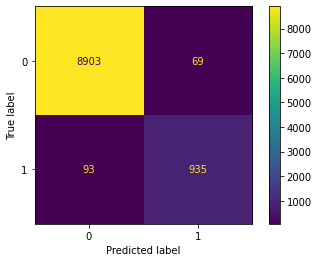

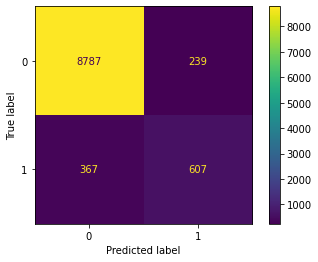

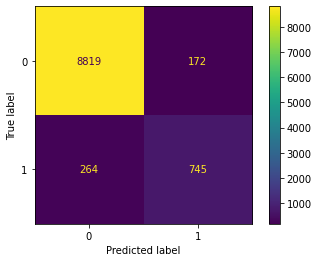

In [ ]:
#applying OVR with every class with loop then using argmax
logestic=[]
for i in np.unique(y_train):
  y_train_binarized=binarized_labels(i,y_train)
  y_test_binarized=binarized_labels(i,y_test)
  model_log=LogisticRegression(random_state=0,max_iter=10)
  model_log.fit(train,y_train_binarized)
  y_pred_log=model_log.predict(x_test__)
  print('Accuracy for LogisticRegression for class %i :'%i,accuracy_score(y_test_binarized,y_pred_log))
  print(confusion_matrix(y_test_binarized, y_pred_log))
  plot_confusion_matrix(model_log,x_test__,y_test_binarized)
  logestic_prob=model_log.predict_proba(x_test__)[:,1]
  logestic.append(logestic_prob)
logestic_predicted= np.argmax(logestic,axis=0)
print("log",logestic_predicted)
print('Accuracy for LogisticRegression_prob',accuracy_score(y_test,logestic_predicted)*100)

[[ 963    0    1    2    0    0    8    2    4    0]
 [   0 1102    2    4    1    1    4    2   18    1]
 [  11    5  897   17   13    0   13   18   50    8]
 [   4    1   21  910    1   24    5   11   23   10]
 [   2    3    5    1  906    1   10    1   13   40]
 [  16    7    6   52   17  692   21   13   54   14]
 [   9    3    4    3   10    9  913    1    6    0]
 [   2    9   24    6    8    2    1  940    3   33]
 [  14   10    8   23   11   28   14   19  837   10]
 [  10    6    7   17   54   12    0   43   10  850]]


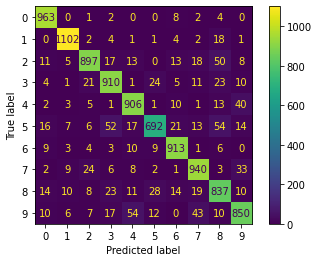

In [ ]:
#plotting confusion matrix after using argmax
print(confusion_matrix(y_test, logestic_predicted))
cm=ConfusionMatrixDisplay(confusion_matrix(y_test, logestic_predicted))
cm.plot()

Applying the other way to OVR without loop.
each class in one cell

Accuracy for LogisticRegression 0.9916
[[8964   56]
 [  28  952]]


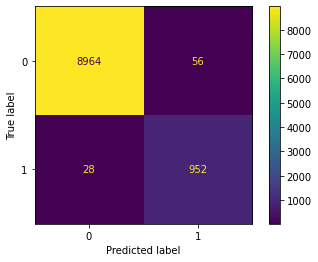

In [ ]:
#class 0
y_train_binarized_0=binarized_labels(0,y_train)
y_test_binarized_0=binarized_labels(0,y_test)
model_log_0=LogisticRegression(random_state=0,max_iter=10)
model_log_0.fit(train,y_train_binarized_0)
y_pred_log=model_log_0.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_0,y_pred_log))
print(confusion_matrix(y_test_binarized_0, y_pred_log))
plot_confusion_matrix(model_log_0,x_test__,y_test_binarized_0)

Accuracy for LogisticRegression 0.9915
[[8833   32]
 [  53 1082]]


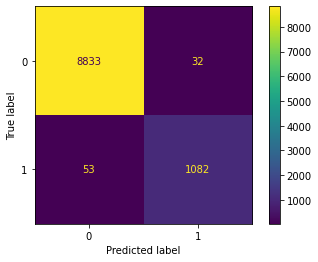

In [ ]:
#class 1
y_train_binarized_1=binarized_labels(1,y_train)
y_test_binarized_1=binarized_labels(1,y_test)
model_log_1=LogisticRegression(random_state=0,max_iter=10)
model_log_1.fit(train,y_train_binarized_1)
y_pred_log_1=model_log_1.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_1,y_pred_log_1))
print(confusion_matrix(y_test_binarized_1, y_pred_log_1))
plot_confusion_matrix(model_log_1,x_test__,y_test_binarized_1)

Accuracy for LogisticRegression 0.9774
[[8904   64]
 [ 162  870]]


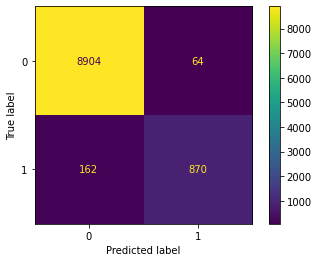

In [ ]:
#class 2
y_train_binarized_2=binarized_labels(2,y_train)
y_test_binarized_2=binarized_labels(2,y_test)
model_log_2=LogisticRegression(random_state=0,max_iter=10)
model_log_2.fit(train,y_train_binarized_2)
y_pred_log_2=model_log_2.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_2,y_pred_log_2))
print(confusion_matrix(y_test_binarized_2, y_pred_log_2))
plot_confusion_matrix(model_log_2,x_test__,y_test_binarized_2)

Accuracy for LogisticRegression 0.9725
[[8878  112]
 [ 163  847]]


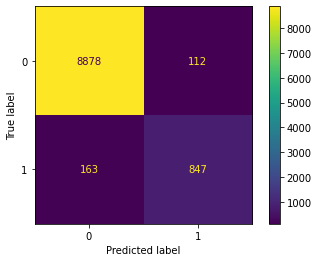

In [ ]:
##class 3
y_train_binarized_3=binarized_labels(3,y_train)
y_test_binarized_3=binarized_labels(3,y_test)
model_log_3=LogisticRegression(random_state=0,max_iter=10)
model_log_3.fit(train,y_train_binarized_3)
y_pred_log_3=model_log_3.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_3,y_pred_log_3))
print(confusion_matrix(y_test_binarized_3, y_pred_log_3))
plot_confusion_matrix(model_log_3,x_test__,y_test_binarized_3)

Accuracy for LogisticRegression 0.9793
[[8926   92]
 [ 115  867]]


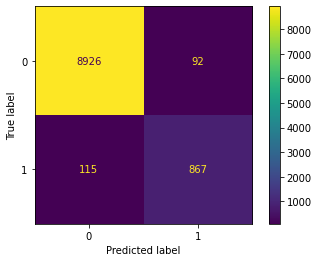

In [ ]:
#class 4
y_train_binarized_4=binarized_labels(4,y_train)
y_test_binarized_4=binarized_labels(4,y_test)
model_log_4=LogisticRegression(random_state=0,max_iter=10)
model_log_4.fit(train,y_train_binarized_4)
y_pred_log_4=model_log_4.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_4,y_pred_log_4))
print(confusion_matrix(y_test_binarized_4, y_pred_log_4))
plot_confusion_matrix(model_log_4,x_test__,y_test_binarized_4)

Accuracy for LogisticRegression 0.9637
[[9010   98]
 [ 265  627]]


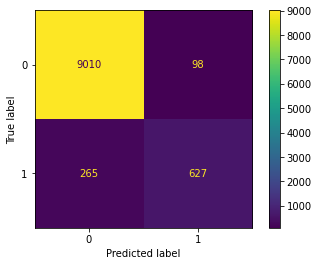

In [ ]:
#class 5
y_train_binarized_5=binarized_labels(5,y_train)
y_test_binarized_5=binarized_labels(5,y_test)
model_log_5=LogisticRegression(random_state=0,max_iter=10)
model_log_5.fit(train,y_train_binarized_5)
y_pred_log_5=model_log_5.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_5,y_pred_log_5))
print(confusion_matrix(y_test_binarized_5, y_pred_log_5))
plot_confusion_matrix(model_log_5,x_test__,y_test_binarized_5)

Accuracy for LogisticRegression 0.9829
[[8960   82]
 [  89  869]]


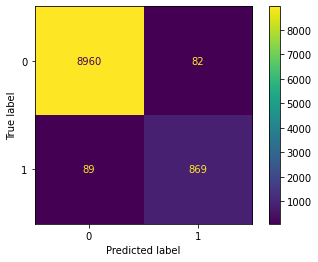

In [ ]:
#class 6
y_train_binarized_6=binarized_labels(6,y_train)
y_test_binarized_6=binarized_labels(6,y_test)
model_log_6=LogisticRegression(random_state=0,max_iter=10)
model_log_6.fit(train,y_train_binarized_6)
y_pred_log_6=model_log_6.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_6,y_pred_log_6))
print(confusion_matrix(y_test_binarized_6, y_pred_log_6))
plot_confusion_matrix(model_log_6,x_test__,y_test_binarized_6)

Accuracy for LogisticRegression 0.9838
[[8903   69]
 [  93  935]]


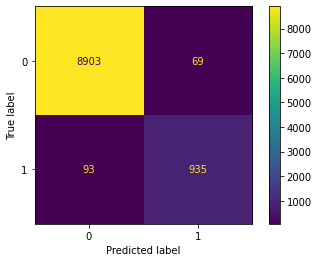

In [ ]:
#class 7
y_train_binarized_7=binarized_labels(7,y_train)
y_test_binarized_7=binarized_labels(7,y_test)
model_log_7=LogisticRegression(random_state=0,max_iter=10)
model_log_7.fit(train,y_train_binarized_7)
y_pred_log_7=model_log_7.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_7,y_pred_log_7))
print(confusion_matrix(y_test_binarized_7, y_pred_log_7))
plot_confusion_matrix(model_log_7,x_test__,y_test_binarized_7)

Accuracy for LogisticRegression 0.9394
[[8787  239]
 [ 367  607]]


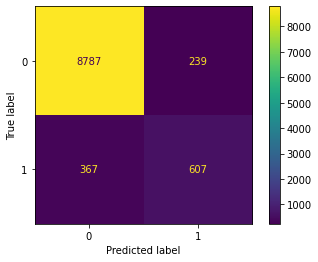

In [ ]:
#class 8
y_train_binarized_8=binarized_labels(8,y_train)
y_test_binarized_8=binarized_labels(8,y_test)
model_log_8=LogisticRegression(random_state=0,max_iter=10)
model_log_8.fit(train,y_train_binarized_8)
y_pred_log_8=model_log_8.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_8,y_pred_log_8))
print(confusion_matrix(y_test_binarized_8, y_pred_log_8))
plot_confusion_matrix(model_log_8,x_test__,y_test_binarized_8)

Accuracy for LogisticRegression 0.9564
[[8819  172]
 [ 264  745]]


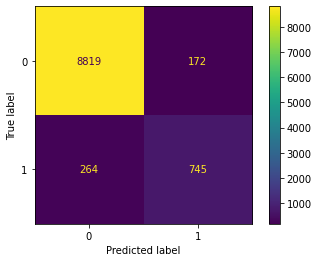

In [ ]:
#class 9
y_train_binarized_9=binarized_labels(9,y_train)
y_test_binarized_9=binarized_labels(9,y_test)
model_log_9=LogisticRegression(random_state=0,max_iter=10)
model_log_9.fit(train,y_train_binarized_9)
y_pred_log_9=model_log_9.predict(x_test__)
print('Accuracy for LogisticRegression',accuracy_score(y_test_binarized_9,y_pred_log_9))
print(confusion_matrix(y_test_binarized_9, y_pred_log_9))
plot_confusion_matrix(model_log_9,x_test__,y_test_binarized_9)

predicted_true_logestic= 9010
logestic_accuracy: 90.10000000000001


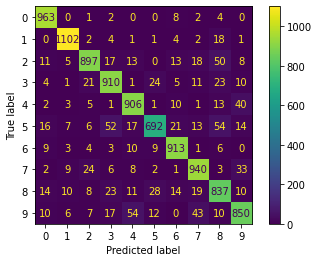

In [ ]:
#using argmax and plot confusion matrix
loge0 = model_log_0.predict_proba(x_test__)[:,1]
loge1 = model_log_1.predict_proba(x_test__)[:,1]
loge2 = model_log_2.predict_proba(x_test__)[:,1]
loge3 = model_log_3.predict_proba(x_test__)[:,1]
loge4 = model_log_4.predict_proba(x_test__)[:,1]
loge5 = model_log_5.predict_proba(x_test__)[:,1]
loge6 = model_log_6.predict_proba(x_test__)[:,1]
loge7 = model_log_7.predict_proba(x_test__)[:,1]
loge8 = model_log_8.predict_proba(x_test__)[:,1]
loge9 = model_log_9.predict_proba(x_test__)[:,1]
loge_predicted= np.argmax([loge0,loge1,loge2,loge3,loge4,loge5,loge6,loge7,loge8,loge9],axis=0)
loge_predicted_true=0
for i in range(len(y_test)):
    if y_test[i]==loge_predicted[i]:
        loge_predicted_true+=1
print("predicted_true_logestic=",loge_predicted_true)
loge_acc=loge_predicted_true/len(y_test)
print("logestic_accuracy:",loge_acc*100)
cm=ConfusionMatrixDisplay(confusion_matrix(y_test, logestic_predicted))
cm.plot()

**Reference for logistic regression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html


## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the MNIST dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

Accuracy for baseline of Lniear svc 87.42
[[ 924    0    3   10    3   10    4    2   18    6]
 [   0 1102    5    7    0    1    4    1   12    3]
 [   3    8  856   76   14    2    7    7   45   14]
 [   4    2   10  928    1   20    2   10   21   12]
 [   1    3    6   13  718    1    2   10   25  203]
 [   7    0    4   87    8  691   16   14   49   16]
 [  13    4   13    7    6   22  876    0   14    3]
 [   1    1   28   15    9    1    1  903    3   66]
 [   4    9    4   68    8   15   11   11  809   35]
 [   4    6    3   15    5    3    0   16   22  935]]


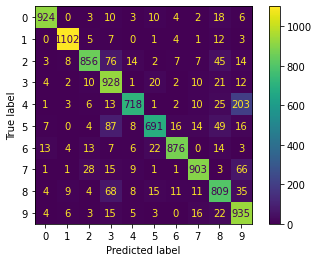

In [ ]:
# Run your SVM experiments here.
#baseline of SVM by LinearSVC
linear_svc=LinearSVC(random_state=0)
linear_svc.fit(train,y_train)
y_pred_svc=linear_svc.predict(x_test__)
print('Accuracy for baseline of Lniear svc',accuracy_score(y_test,y_pred_svc)*100)
print(confusion_matrix(y_test, y_pred_svc))
plot_confusion_matrix(linear_svc,x_test__,y_test)

Accuracy for Lniear svc c 0.0001 = 91.14999999999999
[[ 958    0    1    1    0    3    7    2    6    2]
 [   0 1116    3    2    0    1    5    1    5    2]
 [  12   10  897   12   13    5   18   13   49    3]
 [   8    1   19  876    2   53    5   13   24    9]
 [   3    2    7    1  906    0   10    5   10   38]
 [   9    2    2   18    9  771   16    8   43   14]
 [   8    4    6    0    6   24  899    0   11    0]
 [   2    6   21    4    6    2    1  952    3   31]
 [   9    9    3   16   11   32    9   13  857   15]
 [  10    8    1   12   33    5    0   39   18  883]]
Accuracy for Lniear svc c 0.001 = 88.94999999999999
[[ 954    0    1    3    1    6    8    2    3    2]
 [   0 1112    3    1    1    2    4    0   12    0]
 [  18   22  815   40   12    4   18   11   91    1]
 [   9    1   17  871    2   45    3   10   44    8]
 [   3    1   11    1  918    0    5    1   17   25]
 [  18    3    1   52   13  748    9    7   32    9]
 [  11    4   16    2    9   39  867    0   10

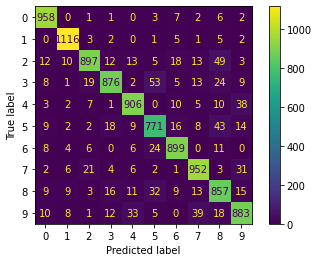

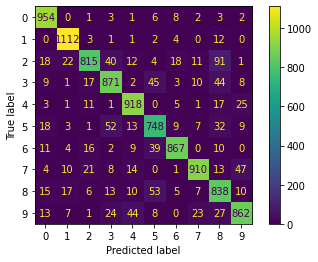

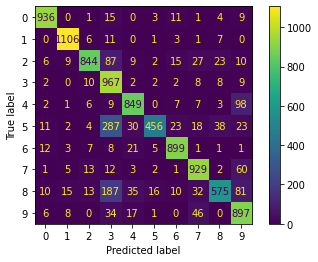

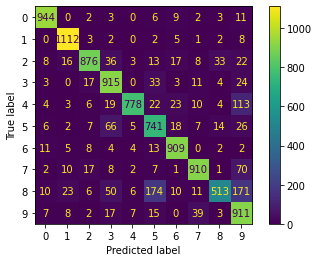

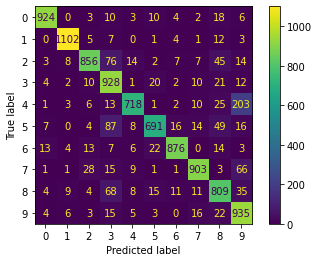

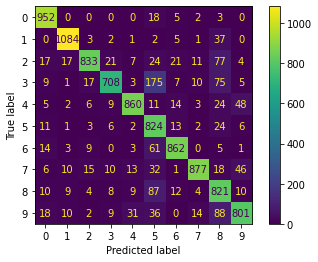

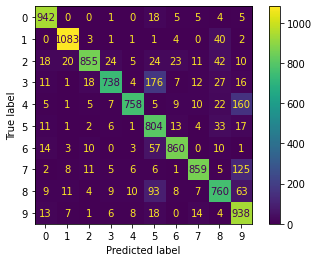

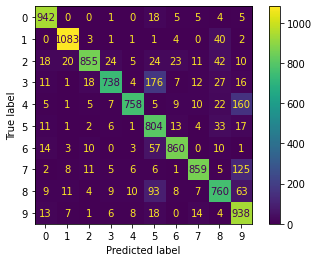

In [28]:
#apply svm by LinearSVC and changing the value of cost(c)
c=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc_cost=[]
for i in c:
    linear_svc_cost=LinearSVC(random_state=0,C=i)
    linear_svc_cost.fit(train,y_train)
    y_pred_svc_cost=linear_svc_cost.predict(x_test__)
    print('Accuracy for Lniear svc c',i,'=',accuracy_score(y_test,y_pred_svc_cost)*100)
    acc_cost.append(accuracy_score(y_test,y_pred_svc_cost)*100)
    print(confusion_matrix(y_test, y_pred_svc_cost))
    plot_confusion_matrix(linear_svc_cost,x_test__,y_test)

Text(0.5, 1.0, 'accuracy and cost pramater in linear svm')

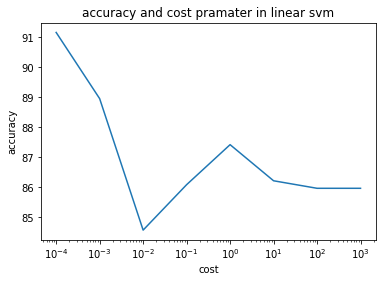

In [29]:
#Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale
plt.plot(c,acc_cost)
plt.xscale("log")
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.title('accuracy and cost pramater in linear svm')

Accuracy for Lniear svc c 0.0001 = 91.23
[[ 959    0    1    2    0    2    7    2    5    2]
 [   0 1113    2    2    0    0    4    1   12    1]
 [   9   10  900   18   13    3   15   12   47    5]
 [   4    0   20  919    1   20    4   11   20   11]
 [   1    3    3    1  908    0    9    2   11   44]
 [  13    2    0   39   12  749   18    8   38   13]
 [  12    3    3    1    6   12  911    1    9    0]
 [   2   12   23    5    8    1    1  938    1   37]
 [  10   10    6   20   13   28   11   18  847   11]
 [  12    8    1   17   44    6    1   30   11  879]]
Accuracy for Lniear svc c 0.001 = 91.94
[[ 960    0    1    1    1    3    6    2    4    2]
 [   0 1116    2    1    0    1    4    1    9    1]
 [   7   11  916   18    9    4   14    8   41    4]
 [   3    0   21  921    1   20    4   12   20    8]
 [   1    1    4    2  916    0   10    2    8   38]
 [  13    2    2   38   10  762   19    8   27   11]
 [  11    3    7    2    5   14  910    1    5    0]
 [   2    6   25 

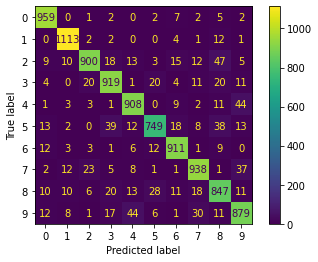

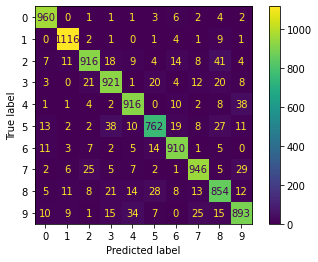

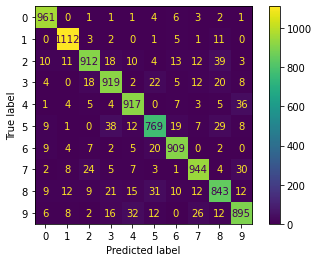

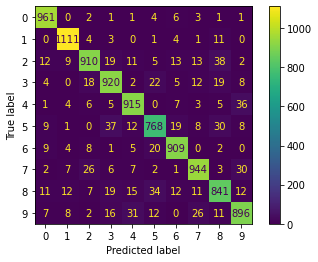

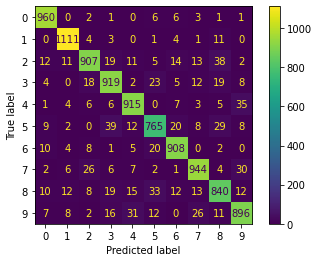

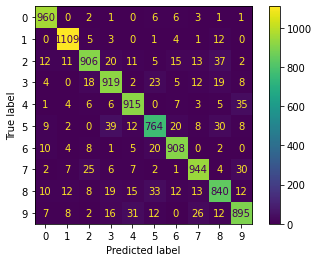

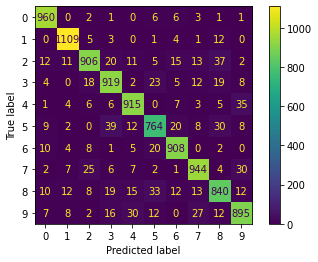

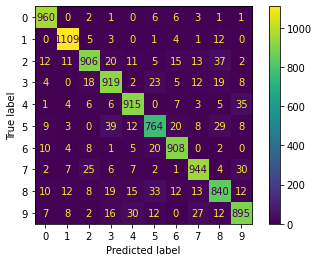

In [30]:
#apply svm by LinearSVC and changing the value of cost(c) add regularization term l1 with dual =false
c1=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc_cost_L1=[]
for i in c1:
    linear_svc_cost_L1=LinearSVC(random_state=0,C=i,penalty="l1",dual=False)
    linear_svc_cost_L1.fit(train,y_train)
    y_pred_svc_cost_L1=linear_svc_cost_L1.predict(x_test__)
    print('Accuracy for Lniear svc c',i,'=',accuracy_score(y_test,y_pred_svc_cost_L1)*100)
    acc_cost_L1.append(accuracy_score(y_test,y_pred_svc_cost_L1)*100)
    print(confusion_matrix(y_test, y_pred_svc_cost_L1))
    plot_confusion_matrix(linear_svc_cost_L1,x_test__,y_test)

[91.23, 91.94, 91.81, 91.75, 91.64999999999999, 91.60000000000001, 91.60000000000001, 91.60000000000001]


Text(0.5, 1.0, 'accuracy and cost pramater in linear svm after adding refularization')

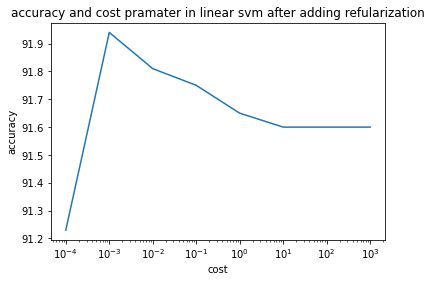

In [31]:
#Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale after adding regularization term l1 with dual= false
print(acc_cost_L1)
plt.plot(c1,acc_cost_L1)
plt.xscale("log")
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.title('accuracy and cost pramater in linear svm after adding refularization')

In [6]:
#random samples from training data
samples = np.random.randint(0,60000,10000) 
x_train_sample=train[samples]
y_train_sample=y_train[samples]

In [ ]:
sample_train = np.random.randint(0,60000,10000) 
sample_test== np.random.randint(0,10000,5000) 
sample_train_x=train[samples]
y_tra=y_train[samples]
x_train_sample=train[samples]
y_train_sample=y_train[samples]

In [7]:
#apply SVC() with kernel rbf and change the value of gamma and cost
c3=[0.01, 0.1, 1, 10, 100]
gamma1=[0.01, 0.1, 1, 10, 100]
acc_svc_=[]
for i in c3:
    for j in gamma1:
        svc_=SVC(kernel='rbf',C=i,gamma=j,random_state=0)
        svc_.fit(x_train_sample,y_train_sample)
        y_pred_svc_=svc_.predict(x_test__)
        print('Accuracy for svc c =',i,'and gamma =',j ,accuracy_score(y_test,y_pred_svc_)*100)
        acc_svc_.append(accuracy_score(y_test,y_pred_svc_)*100)
        print(confusion_matrix(y_test, y_pred_svc_)) 
#        plot_confusion_matrix(svc_,x_test__/255,y_test)

Accuracy for svc c = 0.01 and gamma = 0.01 11.35
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]
Accuracy for svc c = 0.01 and gamma = 0.1 11.35
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 

Text(0.5, 1.0, 'accuracy and cost pramater in kernel svm (rbf)')

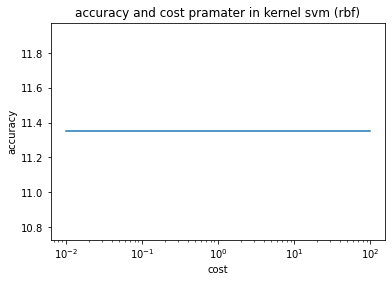

In [8]:
#Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale after applying SVC() with kernel rbf and change the value of gamma and cost
larg_acc1=[]
acc_c_00=acc_svc_[0:5]
acc_c_00.sort()
larg_acc1.append(acc_c_00[-1])
acc_c_22=acc_svc_[5:10]
acc_c_22.sort()
larg_acc1.append(acc_c_22[-1])
acc_c_11=acc_svc_[10:15]
acc_c_11.sort()
larg_acc1.append(acc_c_11[-1])
acc_c_10_=acc_svc_[15:20]
acc_c_10_.sort()
larg_acc1.append(acc_c_10_[-1])
acc_c_100_=acc_svc_[20:25]
acc_c_100_.sort()
larg_acc1.append(acc_c_100_[-1])
plt.plot(c3,larg_acc1)
plt.xscale("log")
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.title('accuracy and cost pramater in kernel svm (rbf)')

# best model from experiment of svm 
LinearSVC with c = 0.001 with regularization term l1

Accuracy for Lniear svc c 0.001 = 91.94
[[ 960    0    1    1    1    3    6    2    4    2]
 [   0 1116    2    1    0    1    4    1    9    1]
 [   7   11  916   18    9    4   14    8   41    4]
 [   3    0   21  921    1   20    4   12   20    8]
 [   1    1    4    2  916    0   10    2    8   38]
 [  13    2    2   38   10  762   19    8   27   11]
 [  11    3    7    2    5   14  910    1    5    0]
 [   2    6   25    5    7    2    1  946    5   29]
 [   5   11    8   21   14   28    8   13  854   12]
 [  10    9    1   15   34    7    0   25   15  893]]


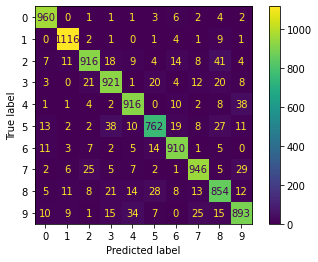

In [7]:
linear_svc_cost_L1_be=LinearSVC(random_state=0,C=0.001,penalty="l1",dual=False)
linear_svc_cost_L1_be.fit(train,y_train)
y_pred_svc_cost_L1_be=linear_svc_cost_L1_be.predict(x_test__)
print('Accuracy for Lniear svc c',0.001,'=',accuracy_score(y_test,y_pred_svc_cost_L1_be)*100)
print(confusion_matrix(y_test, y_pred_svc_cost_L1_be))
plot_confusion_matrix(linear_svc_cost_L1_be,x_test__,y_test)

After applying SVM (suport vector machine) baseline by using the LinearSVC() function.Then i apply changing the value of cost, I obtain the value of cost affect the accuracy of baseline and every value of cost changing the accuracy of LinearSVC.Then i apply changing value of cost with regulartion l1, i obtain the l1 increase accuracy but the value of cost little effect on the accuracy of model with l1 and l1 reduce overfitting because of L1 can set some features to 0 especially in those kind of high-dimentional data like image.

# confusion matrix

confusion matrix is an NxN matrix to present of the accuracy of a model with two or more classes.the main diagonal in confusion matrix is ture positive.true positive is the actual is positive and the predict value is true (match value).the numbers is found off the main diagonal is high (match value).the numbers is found off the main diagonal is high (false positive and false negative is not match between predicted vlues and actual vlues) so the accuray is not very high because of the classes in data is like such as 8 and 3 so the model is not trained well (Model confuse in predicted values).

# using scalling

Accuracy for baseline of Lniear svc with scalling data 91.85
[[ 962    0    2    1    1    4    5    3    1    1]
 [   0 1112    3    2    0    1    5    1   11    0]
 [  11   11  914   18   10    4   13   12   36    3]
 [   4    0   18  919    2   22    5   12   20    8]
 [   1    4    6    3  913    0    9    3    6   37]
 [   9    2    0   39   12  769   17    7   29    8]
 [   7    4    7    2    5   21  909    1    2    0]
 [   2    8   23    5    7    1    1  948    4   29]
 [  11   13    8   21   14   31    8   13  843   12]
 [   7    8    2   15   31   12    0   26   12  896]]


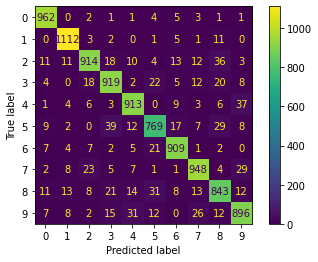

In [8]:
#baseline of SVM by LinearSVC with scalling data
linear_svc_b=LinearSVC(random_state=0)
linear_svc_b.fit(train/255,y_train)
y_pred_svc_b=linear_svc_b.predict(x_test__/255)
print('Accuracy for baseline of Lniear svc with scalling data',accuracy_score(y_test,y_pred_svc_b)*100)
print(confusion_matrix(y_test, y_pred_svc_b))
plot_confusion_matrix(linear_svc_b,x_test__/255,y_test)

Accuracy for Lniear svc c 0.0001 = 89.25
[[ 957    0    2    1    1    0   11    1    7    0]
 [   0 1107    2    3    1    1    4    1   16    0]
 [  11   19  871   19   16    0   19   23   45    9]
 [   6    2   18  907    1   19    8   17   20   12]
 [   1    7    4    1  893    1   12    1    9   53]
 [  18    8    5   61   20  683   28   12   44   13]
 [  13    3    4    2    9   12  910    1    4    0]
 [   2   29   23    4   12    0    3  920    0   35]
 [  13   23    9   30   12   21   15   15  821   15]
 [  17   14    6   14   49    7    3   35    8  856]]
Accuracy for Lniear svc c 0.001 = 91.27
[[ 961    0    0    1    0    3    9    2    4    0]
 [   0 1108    2    2    0    2    4    1   16    0]
 [   7   11  906   17   13    3   15   14   41    5]
 [   4    1   22  916    1   21    5   13   17   10]
 [   1    2    6    1  910    1   12    1    9   39]
 [  12    3    2   37   13  755   20    9   30   11]
 [   9    3    4    2    8   13  914    2    3    0]
 [   2   14   22 

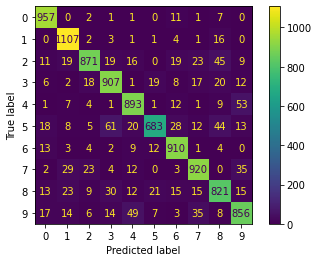

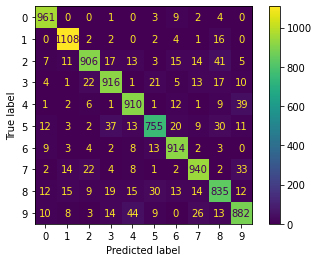

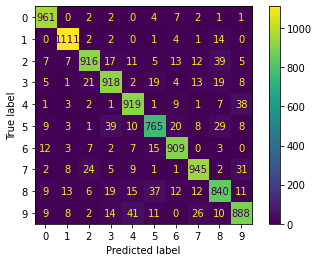

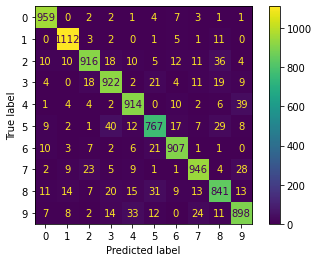

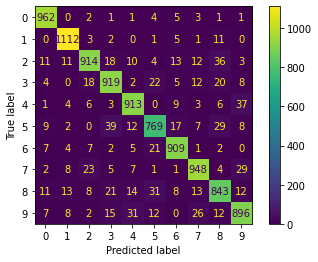

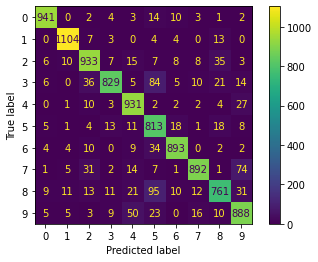

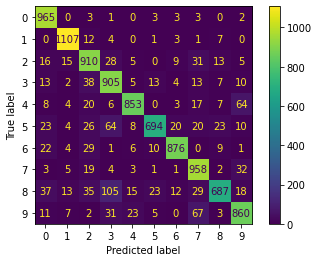

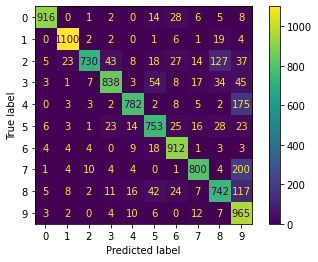

In [9]:
#apply svm by LinearSVC and changing the value of cost(c)
c_b=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc_cost_b=[]
for i in c_b:
    linear_svc_cost_b=LinearSVC(random_state=0,C=i)
    linear_svc_cost_b.fit(train/255,y_train)
    y_pred_svc_cost_b=linear_svc_cost_b.predict(x_test__/255)
    print('Accuracy for Lniear svc c',i,'=',accuracy_score(y_test,y_pred_svc_cost_b)*100)
    acc_cost_b.append(accuracy_score(y_test,y_pred_svc_cost_b)*100)
    print(confusion_matrix(y_test, y_pred_svc_cost_b))
    plot_confusion_matrix(linear_svc_cost_b,x_test__/255,y_test)

Text(0.5, 1.0, 'accuracy and cost pramater in linear svm with scalling data')

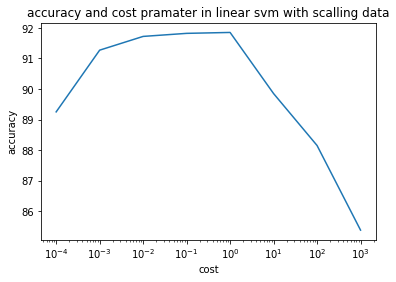

In [10]:
#Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale
plt.plot(c_b,acc_cost_b)
plt.xscale("log")
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.title('accuracy and cost pramater in linear svm with scalling data')

Accuracy for Lniear svc c 0.0001 = 47.49
[[ 974    3    0    0    0    0    1    2    0    0]
 [   4 1098    3    0    3    0   24    3    0    0]
 [ 153  373  158   26   65    0  129  116    6    6]
 [ 215  194   23  464   14    0   32   55    3   10]
 [  37   51    4   12  458    0  163  233    1   23]
 [ 299  179    1  153   63    0   88   78    8   23]
 [ 145   77    2   12    7    0  533  179    1    2]
 [ 162  108   21    6    3    0   15  700    1   12]
 [  41  345   39  129   98    0  142   30   98   52]
 [  74   64   40   81   60    0  197  215   12  266]]
Accuracy for Lniear svc c 0.001 = 85.8
[[ 955    2    0    0    0    3   11    3    5    1]
 [   0 1097    8    4    2    0    5    2   17    0]
 [  19   55  817   16   23    0   25   34   30   13]
 [  11    5   22  872    2   21   11   19   27   20]
 [   3   17    3    1  846    2   25    4   10   71]
 [  32   17    3   89   36  615   32   27   28   13]
 [  21   10    4    1   23   12  876    2    9    0]
 [   7   34   23  

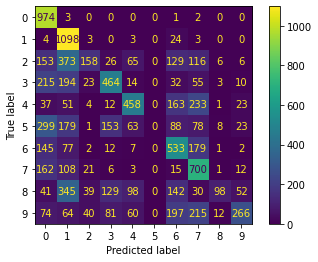

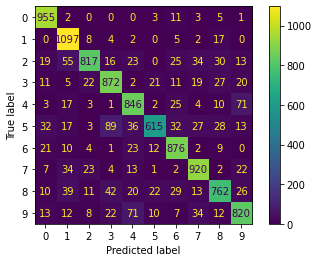

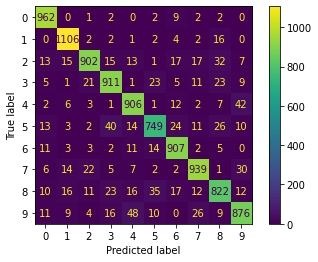

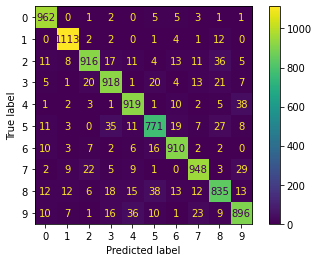

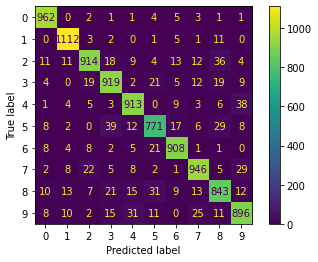

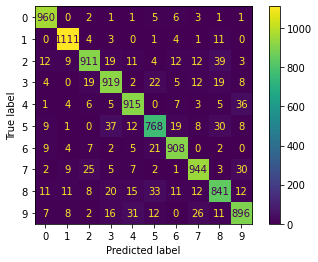

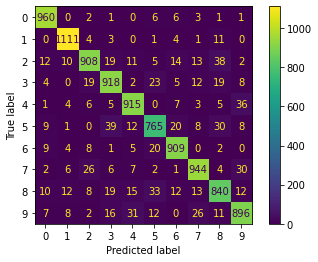

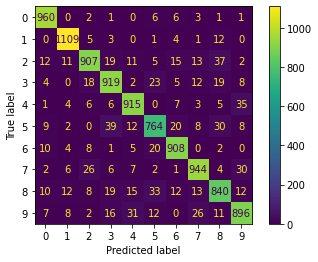

In [12]:
#apply svm by LinearSVC and changing the value of cost(c) add regularization term l1 with dual =false with scalling data
c1_b=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc_cost_L1_b=[]
for i in c1_b:
    linear_svc_cost_L1_b=LinearSVC(random_state=0,C=i,penalty="l1",dual=False)
    linear_svc_cost_L1_b.fit(train/255,y_train)
    y_pred_svc_cost_L1_b=linear_svc_cost_L1_b.predict(x_test__/255)
    print('Accuracy for Lniear svc c',i,'=',accuracy_score(y_test,y_pred_svc_cost_L1_b)*100)
    acc_cost_L1_b.append(accuracy_score(y_test,y_pred_svc_cost_L1_b)*100)
    print(confusion_matrix(y_test, y_pred_svc_cost_L1_b))
    plot_confusion_matrix(linear_svc_cost_L1_b,x_test__/255,y_test)

Text(0.5, 1.0, 'accuracy and cost pramater in linear svm with scalling data')

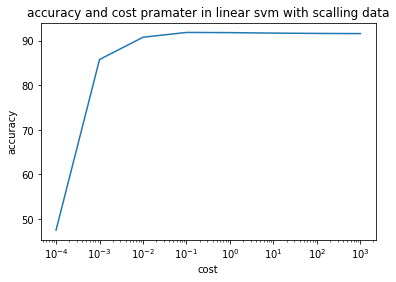

In [13]:
#Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale
plt.plot(c1_b,acc_cost_L1_b)
plt.xscale("log")
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.title('accuracy and cost pramater in linear svm with scalling data')

In [9]:
#apply SVC() with kernel rbf and change the value of gamma and cost with scalling data
c2=[0.01, 0.1, 1, 10, 100]
gamma=[0.01, 0.1, 1, 10, 100]
acc_svc=[]
for i in c2:
    for j in gamma:
        svc=SVC(kernel='rbf',C=i,gamma=j,random_state=0)
        svc.fit(x_train_sample/255,y_train_sample)
        y_pred_svc=svc.predict(x_test__/255)
        print('Accuracy for svc c =',i,'and gamma =',j ,accuracy_score(y_test,y_pred_svc)*100)
        acc_svc.append(accuracy_score(y_test,y_pred_svc)*100)
        print(confusion_matrix(y_test, y_pred_svc)) 
        #plot_confusion_matrix(svc,x_test__,y_test)

Accuracy for svc c = 0.01 and gamma = 0.01 79.41
[[ 902    0    3   19    2   17   25    1   11    0]
 [   0 1110    0    5    0    0    4    0   16    0]
 [  14   48  782   51   21    0   22   23   60   11]
 [   4   18   17  905    1    0    8   18   30    9]
 [   1   17    1    0  553    0   13    4    7  386]
 [  15   39    1  332   32  347   27   13   66   20]
 [  12   12   15    5   28   14  866    0    6    0]
 [   2   50   11    3   14    0    0  908   15   25]
 [   8   28    4  118   10    1   12   18  749   26]
 [  12   17    5   13   45    2    3   78   15  819]]
Accuracy for svc c = 0.01 and gamma = 0.1 11.35
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 

Text(0.5, 1.0, 'accuracy and cost pramater in kernel svm (rbf)')

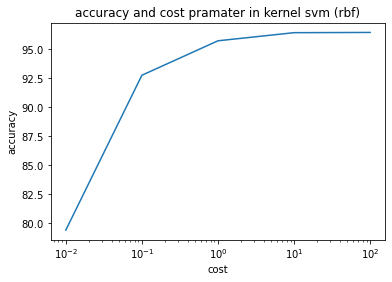

In [10]:
#Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale after applying SVC() with kernel rbf and change the value of gamma and cost
larg_acc=[]
acc_c_0=acc_svc[0:5]
acc_c_0.sort()
larg_acc.append(acc_c_0[-1])
acc_c_2=acc_svc[5:10]
acc_c_2.sort()
larg_acc.append(acc_c_2[-1])
acc_c_1=acc_svc[10:15]
acc_c_1.sort()
larg_acc.append(acc_c_1[-1])
acc_c_10=acc_svc[15:20]
acc_c_10.sort()
larg_acc.append(acc_c_10[-1])
acc_c_100=acc_svc[20:25]
acc_c_100.sort()
larg_acc.append(acc_c_100[-1])
plt.plot(c2,larg_acc)
plt.xscale("log")
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.title('accuracy and cost pramater in kernel svm (rbf)')

In [11]:
larg_acc

[79.41, 92.75999999999999, 95.73, 96.43, 96.45]

using scalling data to compute an alternate feature representation for your dataset. affter applying scalling data with all experiment with svm we obtian scalling data increase accuracy in some cases and decrease accuracy in other cases.

# best model from experiment of svm after scalling
svc with kernel = rbf , c = 100 and gamma = 0.01 with scalling data

Accuracy for svc c = 100 and gamma = 0.01 96.45
[[ 971    0    1    1    0    2    2    2    1    0]
 [   0 1123    2    1    1    1    4    0    2    1]
 [   7    0  986    6    3    2    6   12    8    2]
 [   0    1    7  981    1    4    0    5    6    5]
 [   1    0    3    1  951    0    9    1    2   14]
 [   5    2    2   25    1  840    7    0    6    4]
 [   9    2    2    0    1    9  932    0    3    0]
 [   1   11   14    4    8    0    0  978    1   11]
 [   3    2    3    9    6    8    6    3  929    5]
 [   4    6    3   10   16    3    0    8    5  954]]


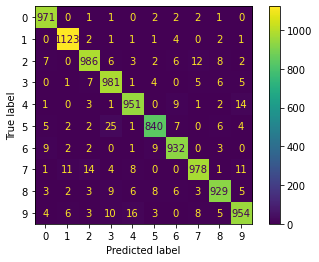

In [13]:
svc_best=SVC(kernel='rbf',C=100,gamma=0.01,random_state=0)
svc_best.fit(x_train_sample/255,y_train_sample)
y_pred_svc_best=svc_best.predict(x_test__/255)
print('Accuracy for svc c =',100,'and gamma =',0.01 ,accuracy_score(y_test,y_pred_svc_best)*100)
print(confusion_matrix(y_test, y_pred_svc_best)) 
plot_confusion_matrix(svc_best,x_test__/255,y_test)

# note

# I run the svc with kernel rbf on the 10000 random samples from training data and all testing data  because of running the algorithm on the all training data consume a lot of time.

After applying SVM (suport vector machine) baseline by using the LinearSVC() function.Then i apply changing the value of cost, I obtain the value of cost affect the accuracy of baseline and every value of cost changing the accuracy of LinearSVC.Then i apply changing value of cost with regulartion l1, i obtain the l1 increase accuracy but the value of cost little effect on the accuracy of model with l1 and l1 not cause overfitting.    

# confusion matrix

confusion matrix is an NxN matrix to present of the accuracy of a model with two or more classes.the main diagonal in confusion matrix is ture positive.true positive is the actual is positive and the predict value is true (match value).the numbers is found off the main diagonal is high (false positive and false negative is not match between predicted vlues and actual vlues) so the accuray is not very high because of the classes in data is like such as 8 and 3 so the model is not trained well (Model confuse in predicted values).

# Bonus

we can use HOG or PCA

**Reference for svm** 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://www.geeksforgeeks.org/how-to-plot-logarithmic-axes-in-matplotlib/

https://machinelearningmastery.com/confusion-matrix-machine-learning/

https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/

## Part 4. Write a Conclusion (1 Mark)
Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

After applying knn,logistic regression and svm (LinearSVC as baseline, LinearSVC with change value of c,change vlalue of c with l1 and svc with rbf kernel change vlaue c and gamma),I found the svm with kernel rbf , c = 100 and gamma =100 with scalling data is the suitability for this task because of hasing the higest accuracy 96.45 and not consuming time compare to logistic regression and KNN but I run the svm with kernel rbf , c = 100 and gamma =100 with scalling data on the part of data because of consuming more time. Knn spend more time and not work very good Curse of Dimensionality.logistic regression with argmax is good because of not consuming time but not very good because of the accuracy is not very high. 

<!-- Write your conclusion here -->